In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import namedtuple
import warnings

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier



warnings.filterwarnings('ignore')
%matplotlib inline 

In [2]:
# Reading the data:
df = pd.read_csv(r'C:\Users\moham\Desktop\thesis\thesis\data\data.csv')

# Getting samples from first stage only
ind = np.logical_and(df.segStageI_index > 0, df.segStageI_index <= 1) 
df = df.loc[ind, :]

# Dropping unused columns:
df = df.drop(['name', 'year', 'segStart_samp', 'segEnd_samp', 'segIndex', 'segStage', 'segStageI_index', 'segStageII_index'], axis=1)

# Dropping missing Values:
df = df.dropna()

# Target Vector:
df['pH'] = (df.pH <= 7.05).astype(int).ravel()

# Feature and target vectors:
y = df['pH'] # target
X = df.drop(['pH'], axis=1) # Feature matrix

# Dataframe
df.head()

,pH,mean,std,median,mad,skewness,kurtosis,bslnMean,bslnSD,stressRatio,...,MF_c1,MF_c2,MF_c3,MF_c4,H310,H29,MF_c1_29,MF_c2_29,MF_c3_29,MF_c4_29
13,0,136.043207,34.244851,144.25,30.625562,-0.299440,1.683251,172.141798,0.458852,0.802292,...,1.541740,-0.320374,-0.072248,0.443586,0.251573,0.322433,1.561143,-0.237683,-0.072733,0.186351
46,0,147.072604,12.863330,145.75,10.407536,0.036986,2.707744,150.480682,2.446956,0.332500,...,1.526265,-0.002046,0.006373,-0.061292,0.476296,0.525474,1.561249,0.009067,-0.000521,-0.062645
64,0,129.858446,16.675711,134.00,12.348971,-0.756702,4.220946,137.205903,1.195552,0.287500,...,1.513655,-0.025695,-0.036561,-0.142221,0.432595,0.460897,1.525905,-0.010476,-0.034858,-0.138176
78,0,117.748872,19.359356,119.25,12.142754,-0.357331,7.590784,121.913976,1.199712,0.352917,...,1.599210,-0.260384,-0.234299,-0.055279,0.189094,0.298341,1.623602,-0.222504,-0.128656,-0.089185
90,0,140.781758,7.376388,141.50,5.412613,-1.310544,9.277056,144.036013,0.720803,0.129167,...,1.415286,-0.116083,-0.014288,-0.030838,0.254531,0.358241,1.486842,-0.096960,0.032126,-0.189776


In [3]:
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(n_jobs=-1, class_weight='balanced'))
]
               )

In [4]:
param_grid = {
    'clf__penalty': ['l1', 'l2'],
    'clf__C': 10.**np.arange(-6,0),
}

In [5]:
grid = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=10, verbose=1, scoring='roc_auc').fit(X, y) #used the whole data

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 113 out of 120 | elapsed:    9.8s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   10.1s finished


In [6]:
print("Best parameter of (CV score = %0.3f) (AUC) :" % grid.best_score_)
print(grid.best_params_)

Best parameter of (CV score = 0.633) (AUC) :
{'clf__C': 0.01, 'clf__penalty': 'l1'}


In [7]:
CVresults = pd.DataFrame(grid.cv_results_);CVresults

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__penalty,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.092148,0.029733,0.005797,0.002226,1e-06,l1,"{'clf__C': 1e-06, 'clf__penalty': 'l1'}",0.500000,0.500000,0.500000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000
1,0.089148,0.031054,0.007296,0.005362,1e-06,l2,"{'clf__C': 1e-06, 'clf__penalty': 'l2'}",0.571791,0.702943,0.748097,...,0.631433,0.656312,0.640024,0.649990,0.664174,0.642308,0.662422,0.654709,0.650323,0.010584
2,0.060266,0.020084,0.004499,0.001360,1e-05,l1,"{'clf__C': 1e-05, 'clf__penalty': 'l1'}",0.500000,0.500000,0.500000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000
3,0.073058,0.006800,0.004498,0.001499,1e-05,l2,"{'clf__C': 1e-05, 'clf__penalty': 'l2'}",0.572045,0.707509,0.749366,...,0.634537,0.659393,0.643227,0.652358,0.666898,0.645371,0.665521,0.657436,0.653264,0.010524
4,0.052969,0.006764,0.004099,0.001220,0.0001,l1,"{'clf__C': 0.0001, 'clf__penalty': 'l1'}",0.500000,0.500000,0.500000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000
5,0.080155,0.011236,0.004697,0.000782,0.0001,l2,"{'clf__C': 0.0001, 'clf__penalty': 'l2'}",0.560375,0.720700,0.762811,...,0.655297,0.677989,0.665642,0.668521,0.685395,0.663861,0.686664,0.674771,0.672575,0.010219
6,0.052172,0.004284,0.004796,0.001168,0.001,l1,"{'clf__C': 0.001, 'clf__penalty': 'l1'}",0.500000,0.500000,0.500000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000
7,0.103841,0.013217,0.004598,0.001279,0.001,l2,"{'clf__C': 0.001, 'clf__penalty': 'l2'}",0.517504,0.728057,0.752410,...,0.701328,0.715473,0.712548,0.702779,0.723212,0.699930,0.728982,0.709278,0.712586,0.010070
8,0.119631,0.038270,0.005998,0.004557,0.01,l1,"{'clf__C': 0.01, 'clf__penalty': 'l1'}",0.546677,0.769914,0.683917,...,0.695399,0.703785,0.693489,0.680314,0.710726,0.686928,0.714443,0.694566,0.696613,0.010594
9,0.173101,0.010992,0.005797,0.003186,0.01,l2,"{'clf__C': 0.01, 'clf__penalty': 'l2'}",0.512430,0.697869,0.717402,...,0.732513,0.745269,0.743333,0.733427,0.751180,0.724995,0.755873,0.734587,0.741074,0.010168


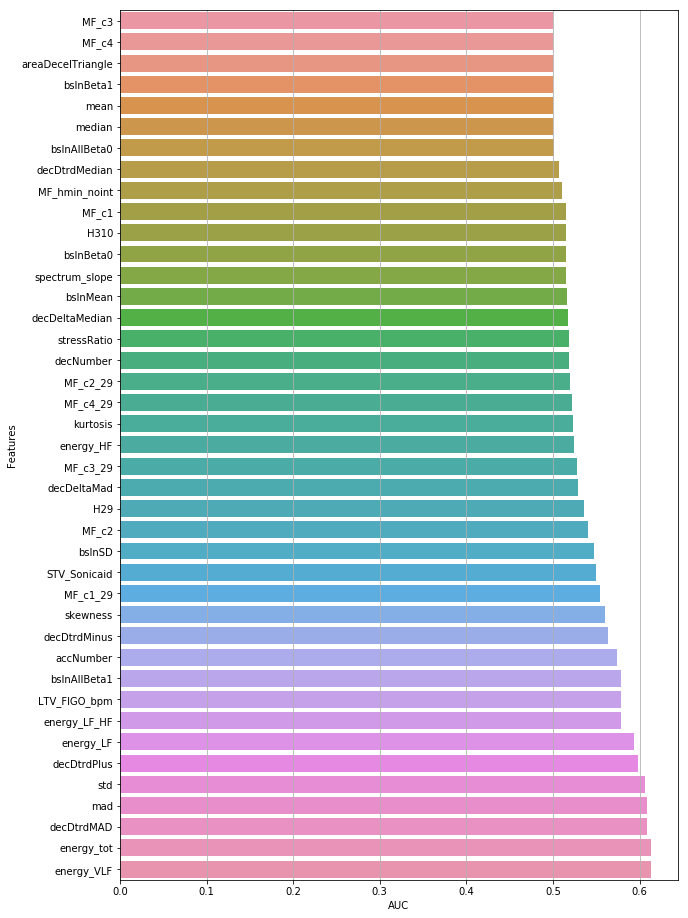

In [8]:
scores = []
cols = []
for i, col in enumerate(X.columns):
    cols.append(col)
    auc = cross_val_score(grid.best_estimator_, pd.DataFrame(X.iloc[:,i]), y, cv=10, scoring='roc_auc').mean()
    if auc < 0.5:
        scores.append(1 - auc)
    else:
        scores.append(auc)
scores, col = zip(*sorted(zip(scores, cols)))
plt.figure().set_size_inches(10,16)
plt.grid(True)
plt.ylabel('Features')
plt.xlabel('AUC')
plot = sns.barplot(list(scores), list(col))
figure = plot.get_figure() 
#figure.savefig(r"C:\Users\moham\Desktop\thesis\featureAUC.png")
plot